# Neural network classification demo (Tensorflow)
### Our task will be to design a neural network to classify precipiation type using temperature and dewpoint data from weather stations in Illinois. How accurate can you make it by changing the network design.

1. Download and read data: Dataset is 5 minute automated surface observing system data from Illinois sites from 2000-2022 containing temperature, dewpoint temperature, and observed precipiation types and amounts.

In [1]:
!wget https://uofi.box.com/shared/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv -O illinois_asos.csv

--2025-11-27 21:24:45--  https://uofi.box.com/shared/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv
Resolving uofi.box.com (uofi.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to uofi.box.com (uofi.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv [following]
--2025-11-27 21:24:45--  https://uofi.box.com/public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv [following]
--2025-11-27 21:24:45--  https://uofi.app.box.com/public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv
Resolving uofi.app.box.com (uofi.app.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to uofi.app.box.com (uofi.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response..

2. Import data

In [4]:
import pandas as pd
import tensorflow as tf
df = pd.read_csv('illinois_asos.csv', delimiter=',')
df

,station,valid,tmpf,dwpf,p01i,wxcodes
0,MDW,2000-01-01 00:53,35.00,29.00,M,M
1,DPA,2000-01-01 00:53,28.04,24.08,M,M
2,PIA,2000-01-01 00:54,26.06,19.04,M,M
3,SPI,2000-01-01 00:54,19.94,15.08,M,M
4,RFD,2000-01-01 00:54,19.94,15.98,M,M
...,...,...,...,...,...,...
3167008,UGN,2022-11-29 23:55,57.90,48.90,0.00,M
3167009,DKB,2022-11-29 23:55,54.50,52.50,0.00,M
3167010,DNV,2022-11-29 23:55,57.70,53.60,0.00,M
3167011,JOT,2022-11-29 23:55,58.60,54.00,0.00,M


3. Create a precip_flag and set all non-rain winter precipitation types to class 1, rain class 0

In [5]:
df['ptype_flag'] = -1.0
mask = df['wxcodes'].str.contains('RA')
df.loc[mask, 'ptype_flag'] = 0
mask = df['wxcodes'].str.contains('DZ')
df.loc[mask, 'ptype_flag'] = 0
mask = df['wxcodes'].str.contains('SN')
df.loc[mask, 'ptype_flag'] = 1
mask = df['wxcodes'].str.contains('IP')
df.loc[mask, 'ptype_flag'] = 1
mask = df['wxcodes'].str.contains('FZRA')
df.loc[mask, 'ptype_flag'] = 1
mask = df['wxcodes'].str.contains('FZDZ')
df.loc[mask, 'ptype_flag'] = 1

4. Clean up data and make usable in a precip-only dataframe.

In [6]:
df_precip = df[(df['ptype_flag'] >= 0) & (df['tmpf'] != 'M') & (df['dwpf'] != 'M') & (df['tmpf'] >= df['dwpf'])]
df_precip['tmpf']=df_precip['tmpf'].astype('float')
df_precip['dwpf']=df_precip['dwpf'].astype('float')

/tmp/ipykernel_1217/2495882654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['tmpf']=df_precip['tmpf'].astype('float')
/tmp/ipykernel_1217/2495882654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['dwpf']=df_precip['dwpf'].astype('float')


5. Do a quick look of data.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Classification of observed preciptiation type (0=liquid, 1=solid)')

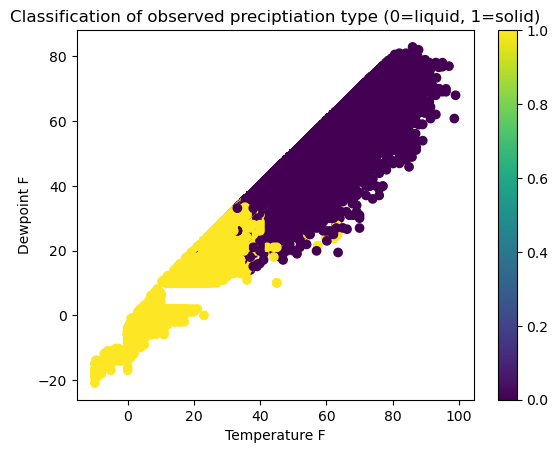

In [8]:
%pylab inline
plt.scatter(df_precip['tmpf'],df_precip['dwpf'],c=df_precip['ptype_flag'])
plt.colorbar()
plt.xlabel('Temperature F')
plt.ylabel('Dewpoint F')
plt.title('Classification of observed preciptiation type (0=liquid, 1=solid)')

In [9]:
df_precip

,station,valid,tmpf,dwpf,p01i,wxcodes,ptype_flag
206,RFD,2000-01-02 02:54,39.02,32.00,0.01,-RA,0.0
212,MDW,2000-01-02 03:53,44.96,35.06,T,-RA,0.0
221,ORD,2000-01-02 03:56,42.08,35.96,T,-RA,0.0
236,ARR,2000-01-02 05:53,39.92,37.04,T,-RA BR,0.0
242,RFD,2000-01-02 05:54,39.92,32.00,T,-RA,0.0
...,...,...,...,...,...,...,...
3166911,MWA,2022-11-29 18:50,57.20,55.40,0.00,-RABR,0.0
3166933,MTO,2022-11-29 19:53,57.00,52.00,0.01,-RA,0.0
3166951,MTO,2022-11-29 20:53,57.00,53.10,T,-RA,0.0
3166969,CMI,2022-11-29 21:53,57.00,54.00,T,-RA,0.0


6. Create target and feature arrays

In [10]:
target = df_precip.pop('ptype_flag')

In [11]:
numeric_feature_names = ['tmpf', 'dwpf']
numeric_features = df_precip[numeric_feature_names].astype('float')
numeric_features.head()

,tmpf,dwpf
206,39.02,32.00
212,44.96,35.06
221,42.08,35.96
236,39.92,37.04
242,39.92,32.00


7. Start building the tensorflow model. First up, build a normalizer for the features to make them have a mean of 0 and standard deviation of 1.

In [13]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(numeric_features)

numeric_array = numeric_features.to_numpy().astype("float32")

# Create and adapt the Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_array)

print("Normalization layer adapted to shape:", numeric_array.shape)

Normalization layer adapted to shape: (244068, 2)


E0000 00:00:1764280524.081665    1217 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1764280524.100587    1217 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.4244465 , -0.61374557],
       [-0.0777823 , -0.4372053 ],
       [-0.24586178, -0.38528186]], dtype=float32)>

8. Create the model and compile it in tensorflow/keras. Note the hyperparameters of the layers, and activation function. You can add layers, or nodes to each layer. The normalizer is the first layer, and last layer ('sigmoid') gives the probability of the classification. There are three more hyperparameters, the optimizer (and its learning rate), the loss function, and the metrics. See the tensorflow documentation for what you can change here.

In [21]:
# def get_basic_model():
#   model = tf.keras.Sequential([
#     normalizer,
#     tf.keras.layers.Dense(128, activation='relu'),
# #Change or add more/fewer layers here
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#   ])
#   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])
#   return model

def get_basic_model(
    n_hidden=2,          # number of hidden layers
    units=32,           # units per hidden layer
    dropout=0.0,        # dropout rate
    lr=1e-3             # learning rate
):
    inputs = tf.keras.Input(shape=(numeric_features.shape[1],))

    # if you already have a Normalization layer, you can use that instead
    x = tf.keras.layers.Normalization(axis=-1)(inputs)

    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(units, activation="relu")(x)
        if dropout > 0:
            x = tf.keras.layers.Dropout(dropout)(x)

    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


9. Let's run. Here you can change the batch size, the number of epochs, and the validation split.

In [22]:
# tf.keras.backend.clear_session()
# BATCH_SIZE=2000
# model = get_basic_model()
# history = model.fit(numeric_features, target, epochs=30,  validation_split=0.3, batch_size=BATCH_SIZE)

from itertools import product

X = numeric_features.to_numpy().astype("float32")
y = target.astype("float32")

param_grid = {
    "n_hidden": [1, 2, 3],
    "units":    [16, 32, 64],
    "dropout":  [0.0, 0.2],
    "lr":       [1e-3, 3e-4],
    "batch":    [512, 1024],
}

configs = list(product(param_grid["n_hidden"],
                       param_grid["units"],
                       param_grid["dropout"],
                       param_grid["lr"],
                       param_grid["batch"]))

best_val_acc = 0.0
best_cfg = None
best_history = None

for n_hidden, units, dropout, lr, batch in configs:
    print(f"\n=== Trying: layers={n_hidden}, units={units}, "
          f"dropout={dropout}, lr={lr}, batch={batch} ===")

    tf.keras.backend.clear_session()
    model = get_basic_model(n_hidden=n_hidden,
                            units=units,
                            dropout=dropout,
                            lr=lr)

    history = model.fit(
        X, y,
        epochs=40,
        validation_split=0.3,
        batch_size=batch,
        verbose=0,  # set to 1 if you want to see each epoch
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                patience=5, restore_best_weights=True, monitor="val_accuracy"
            )
        ],
    )

    val_acc = max(history.history["val_accuracy"])
    print(f"Best val_accuracy for this config: {val_acc:.3f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_cfg = (n_hidden, units, dropout, lr, batch)
        best_history = history
        best_model = model

print("\n=== BEST CONFIG ===")
print(f"layers={best_cfg[0]}, units={best_cfg[1]}, "
      f"dropout={best_cfg[2]}, lr={best_cfg[3]}, batch={best_cfg[4]}")
print(f"Best validation accuracy: {best_val_acc:.3f}")


=== Trying: layers=1, units=16, dropout=0.0, lr=0.001, batch=512 ===
Best val_accuracy for this config: 0.969

=== Trying: layers=1, units=16, dropout=0.0, lr=0.001, batch=1024 ===
Best val_accuracy for this config: 0.969

=== Trying: layers=1, units=16, dropout=0.0, lr=0.0003, batch=512 ===
Best val_accuracy for this config: 0.969

=== Trying: layers=1, units=16, dropout=0.0, lr=0.0003, batch=1024 ===
Best val_accuracy for this config: 0.958

=== Trying: layers=1, units=16, dropout=0.2, lr=0.001, batch=512 ===
Best val_accuracy for this config: 0.969

=== Trying: layers=1, units=16, dropout=0.2, lr=0.001, batch=1024 ===
Best val_accuracy for this config: 0.969

=== Trying: layers=1, units=16, dropout=0.2, lr=0.0003, batch=512 ===
Best val_accuracy for this config: 0.968

=== Trying: layers=1, units=16, dropout=0.2, lr=0.0003, batch=1024 ===
Best val_accuracy for this config: 0.945

=== Trying: layers=1, units=32, dropout=0.0, lr=0.001, batch=512 ===
Best val_accuracy for this config:

In [24]:
print("\n=== BEST CONFIG ===")
print(f"layers={best_cfg[0]}, units={best_cfg[1]}, "
      f"dropout={best_cfg[2]}, lr={best_cfg[3]}, batch={best_cfg[4]}")
print(f"Best validation accuracy: {best_val_acc:.3f}")

# Find epoch of best validation accuracy
val_acc_history = best_history.history["val_accuracy"]
best_epoch = int(np.argmax(val_acc_history))

train_loss = best_history.history["loss"][best_epoch]
train_acc  = best_history.history["accuracy"][best_epoch]
val_loss   = best_history.history["val_loss"][best_epoch]
val_acc    = best_history.history["val_accuracy"][best_epoch]

print("\n=== Metrics at best epoch ===")
print(f"Best epoch index: {best_epoch}")
print(f"Training Loss:      {train_loss:.4f}")
print(f"Training Accuracy:  {train_acc:.4f}")
print(f"Validation Loss:    {val_loss:.4f}")
print(f"Validation Accuracy:{val_acc:.4f}")


=== BEST CONFIG ===
layers=2, units=16, dropout=0.0, lr=0.001, batch=1024
Best validation accuracy: 0.969

=== Metrics at best epoch ===
Best epoch index: 15
Training Loss:      0.0942
Training Accuracy:  0.9657
Validation Loss:    0.0840
Validation Accuracy:0.9691


10. Let's make the model predict an answer! The answer will be the probability of solid precipitation.

In [19]:
# model.predict([32,32])

x_new = np.array([[32.0, 32.0]], dtype="float32")  # shape (1, 2)
y_pred = model.predict(x_new)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.7232727]]


Now, lets run the model over a domain of values (some are unphysical) and are out of our training domain. But you can see the observed values and the model probabilities on this plot.

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step


Text(0.5, 1.0, 'Observations (red-frozen, blue-liquid) and model predicted probabilities (shaded)')

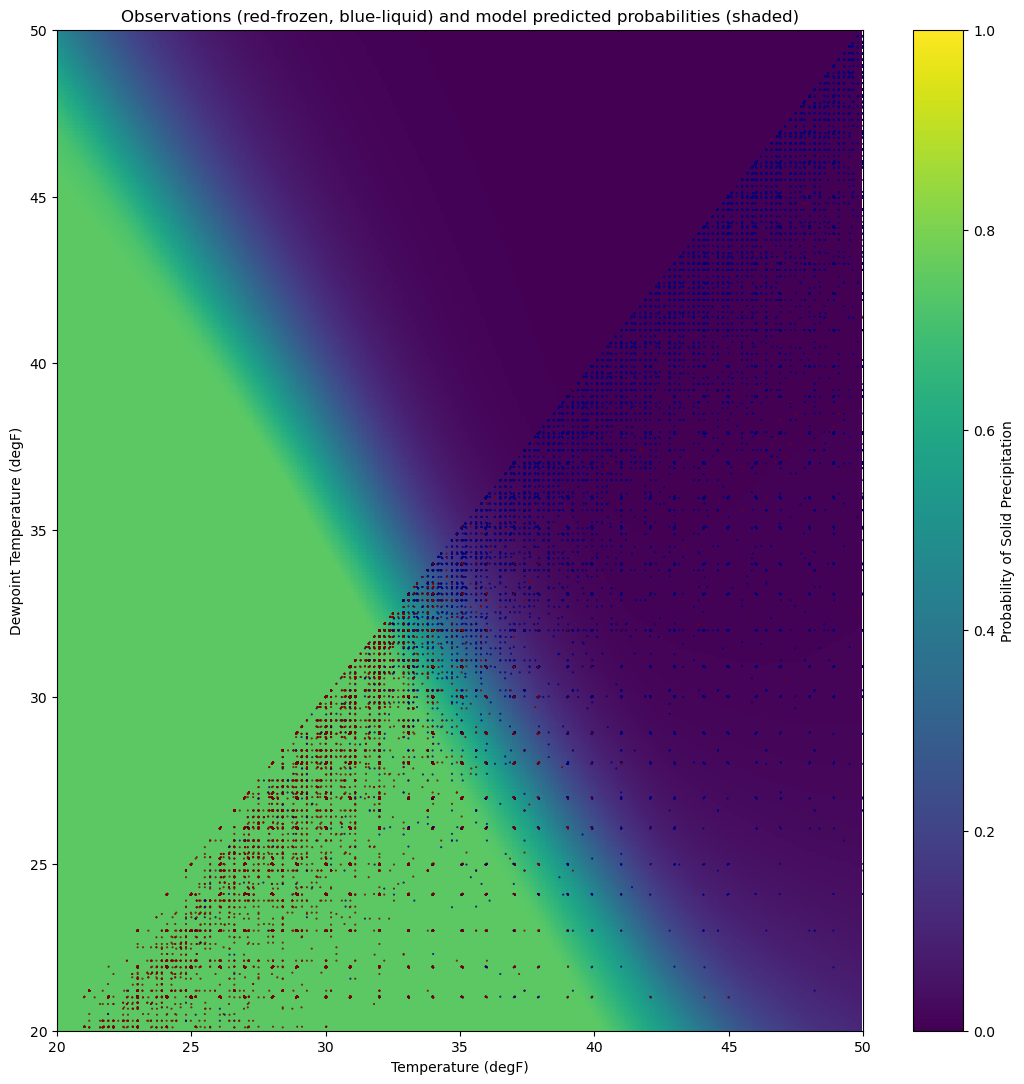

In [20]:
temp_test = np.arange(20,50,0.1)
tdew_test = np.arange(20,50,0.1)

data = np.reshape(np.array(np.meshgrid(temp_test,tdew_test)),[2,300*300]).T

output = model.predict(data)

outgrid = np.reshape(output,[300,300])
fig = plt.figure(figsize=(13,13))
fig.set_facecolor('w')
plt.pcolormesh(temp_test,tdew_test,outgrid, cmap='viridis', vmin=[0,1])
plt.colorbar(label='Probability of Solid Precipitation')
g=plt.scatter(numeric_features['tmpf'],numeric_features['dwpf'], c = target, cmap='jet', vmin=[0,1], s=0.2)
#g.set_facecolor('none')
plt.xlim(20,50)
plt.ylim(20,50)
plt.xlabel('Temperature (degF)')
plt.ylabel('Dewpoint Temperature (degF)')
plt.title('Observations (red-frozen, blue-liquid) and model predicted probabilities (shaded)')

Physically, we would expect frozen precipiation to be observed at higher temperatures above freezing with lower humidity due to sublimation. Can your model capture this?

Frozen precipitation forms when temperatures are cold enough for ice saturation to occur aloft in precipitating clouds. The plotted observations show frozen precipitation tightly clustered over cold and sufficiently humid points, near or below the 32degF freezing threshold. The model’s probability gradient mirrors this structure, indicating that the neural network classifier has successfully learned the physically correct signal separation from the input predictors. The model does capture the surface feature relationships associated with frozen precipitation and avoids predicting ice precipitation in warm/dry conditions, confirming it has extracted the right physical structure from the data.